In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,KFold
warnings.filterwarnings('ignore')

In [2]:
data=fetch_covtype()
covtype=pd.DataFrame(data['data'])
covtype['target']=data['target']
covtype.head(3)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


## Task 2.1

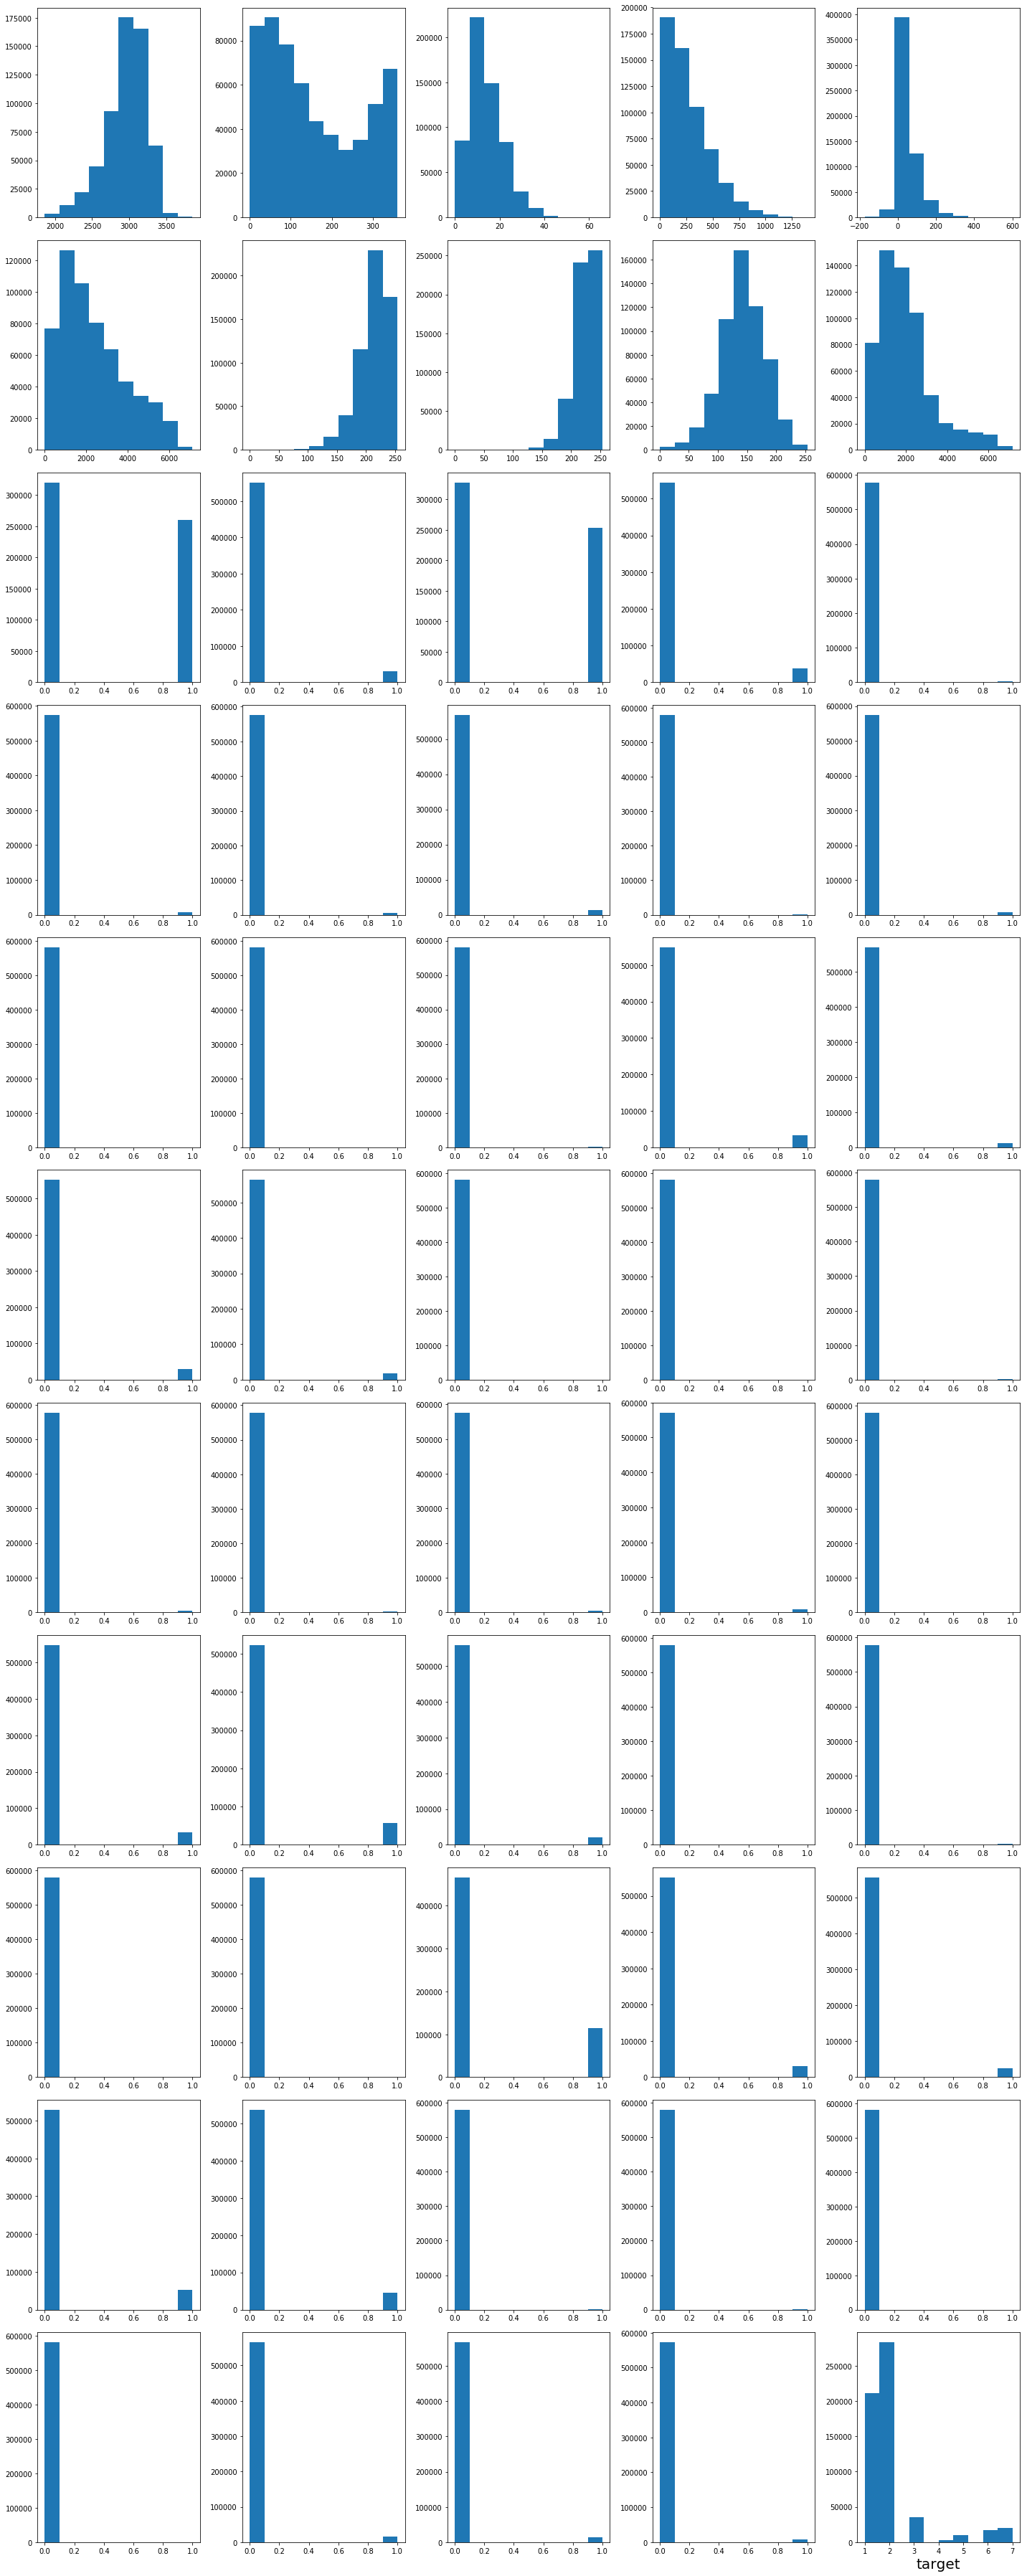

In [3]:
cols=covtype.columns
fig=plt.figure(figsize=(20,50))
for i in range(len(cols)):
    plt.subplot(11,5,i+1)
    plt.hist(covtype[cols[i]])
    if i==len(cols)-1:
        plt.xlabel('target',fontsize=20)
plt.tight_layout()
plt.show()

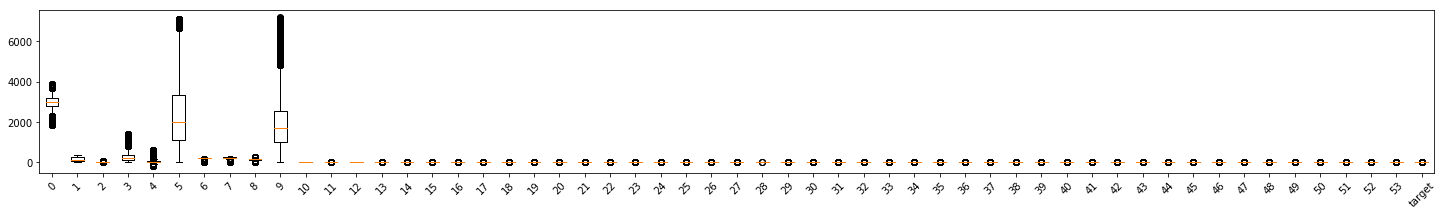

In [4]:
fig=plt.figure(figsize=(25,3))
plt.boxplot(covtype.values)
plt.xticks(range(1,covtype.values.shape[1]+1),covtype.columns,rotation=45)
plt.show()

## Task 2.2

In [3]:
scaler=StandardScaler()
cols=covtype.columns
X=covtype[cols[:-1]].values
y=covtype[cols[-1]]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Logistic Regression

**a)  Before scaled**

In [6]:
score_logist=np.mean(cross_val_score(LogisticRegression(),x_train,y_train,cv=5))
print("The mean cross validation score of Logistic Regression before scaled is %.6f" %score_logist)

The mean cross validation score of Logistic Regression before scaled is 0.710035


**b)  After scled**

In [7]:
score_logist_scaled=np.mean(cross_val_score(LogisticRegression(),x_train_scaled,y_train,cv=5))
print("The mean cross validation score of Logistic Regression after scaled is %.6f" %score_logist_scaled)

The mean cross validation score of Logistic Regression after scaled is 0.715049


**Therefore, for Logistics Regression, scaling will help improve the mean cross validation score.**

### Linear SVM

**a) Before scale**

In [8]:
score_LinSVM=np.mean(cross_val_score(LinearSVC(dual=False),x_train,y_train,cv=5))
print("The mean cross validation score of Linear SVM before scaled is %.6f" %score_LinSVM)

The mean cross validation score of Linear SVM before scaled is 0.705167


**b) After sclae**

In [9]:
score_LinSVM_scaled=np.mean(cross_val_score(LinearSVC(dual=False),x_train_scaled,y_train,cv=5))
print("The mean cross validation score of Linear SVM after scaled is %.6f" %score_LinSVM_scaled)

The mean cross validation score of Linear SVM after scaled is 0.712605


**Therefore, for Linear SVM, scaling will help improve the mean cross validation score.**

### Nearest Centroid

**a) Before scale**

In [10]:
score_NC=np.mean(cross_val_score(NearestCentroid(),x_train,y_train,cv=5))
print("The mean cross validation score of Nearest Centroid before scaled is %.6f" %score_NC)

The mean cross validation score of Nearest Centroid before scaled is 0.193586


**b) After scale**

In [11]:
score_NC_scaled=np.mean(cross_val_score(NearestCentroid(),x_train_scaled,y_train,cv=5))
print("The mean cross validation score of Nearest Centroid after scaled is %.6f" %score_NC_scaled)

The mean cross validation score of Nearest Centroid after scaled is 0.549942


**Therefore, for Nearest Centroid, scaling will help improve the mean cross validation score.**

**As we can see, the performance of the scaled data in three models is better. Hence, in the following sessions, scaled data will be used to train the models.**

## Task 2.3

### In Task 2.3 only scaled data are considered for model training.

### Logistic Regression

In [12]:
param_grid_LR={'C':np.logspace(-2,1.2,15)}
grid_logistic=GridSearchCV(LogisticRegression(),param_grid=param_grid_LR,cv=5)
grid_logistic.fit(x_train_scaled,y_train)
print("The mean cross validation score of Logistic Regression after tuning is %.6f" %grid_logistic.best_score_)
print("The mean cross validation score of Logistic Regression before tuning is %.6f" %score_logist_scaled)

The mean cross validation score of Logistic Regression after tuning is 0.715132
The mean cross validation score of Logistic Regression before tuning is 0.715049


**Therefore, for Logistic Regression, the result after parameter tuning is slightly better.**

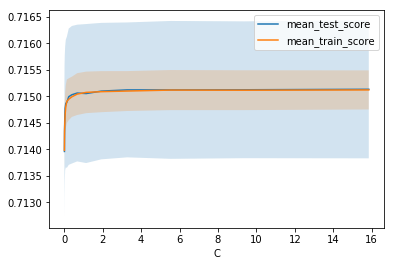

In [13]:
param_range=np.logspace(-2,1.2,15)
fig,ax=plt.subplots()
ax.plot(param_range,grid_logistic.cv_results_['mean_test_score'],label='mean_test_score')
ax.fill_between(param_range,grid_logistic.cv_results_['mean_test_score']-grid_logistic.cv_results_['std_test_score'],grid_logistic.cv_results_['mean_test_score']+grid_logistic.cv_results_['std_test_score'],alpha=0.2)
ax.plot(param_range,grid_logistic.cv_results_['mean_train_score'],label='mean_train_score')
ax.fill_between(param_range,grid_logistic.cv_results_['mean_train_score']-grid_logistic.cv_results_['std_train_score'],grid_logistic.cv_results_['mean_train_score']+grid_logistic.cv_results_['std_train_score'],alpha=0.2)
ax.set_xlabel('C')
plt.legend()
plt.show()

### Linear SVM

In [14]:
param_grid_SVM={'C':np.logspace(-2,1,15)}
grid_svm=GridSearchCV(LinearSVC(dual=False),param_grid=param_grid_SVM,cv=5)
grid_svm.fit(x_train_scaled,y_train)
print("The mean cross validation score of Linear SVM after tuning is %.6f" %grid_svm.best_score_)
print("The mean cross validation score of Linear SVM before tuning is %.6f" %score_LinSVM_scaled)

The mean cross validation score of Linear SVM after tuning is 0.712607
The mean cross validation score of Linear SVM before tuning is 0.712605


**Therefore, for Linear SVM, the result after parameter tuning is slightly better**

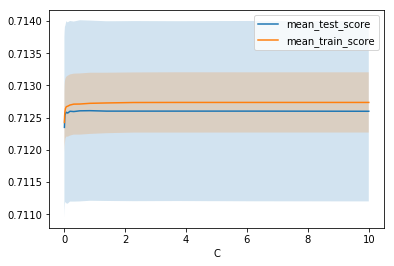

In [15]:
param_range=np.logspace(-2,1,15)
#param_range=np.linspace(0,100,10)
fig,ax=plt.subplots()
ax.plot(param_range,grid_svm.cv_results_['mean_test_score'],label='mean_test_score')
ax.fill_between(param_range,grid_svm.cv_results_['mean_test_score']-grid_svm.cv_results_['std_test_score'],grid_svm.cv_results_['mean_test_score']+grid_svm.cv_results_['std_test_score'],alpha=0.2)
ax.plot(param_range,grid_svm.cv_results_['mean_train_score'],label='mean_train_score')
ax.fill_between(param_range,grid_svm.cv_results_['mean_train_score']-grid_svm.cv_results_['std_train_score'],grid_svm.cv_results_['mean_train_score']+grid_svm.cv_results_['std_train_score'],alpha=0.2)
ax.set_xlabel('C')
plt.legend()
plt.show()

### Nearest Centroid

In [16]:
param_grid_NC={'shrink_threshold':np.linspace(0,20,200)}
grid_NC=GridSearchCV(NearestCentroid(),param_grid=param_grid_NC,cv=5)
grid_NC.fit(x_train_scaled,y_train)
print("The mean cross validation score of Nearest Centroid after tuning is %.6f" %grid_NC.best_score_)
print("The mean cross validation score of Nearest Centroid before tuning is %.6f" %score_NC_scaled)

The mean cross validation score of Nearest Centroid after tuning is 0.549942
The mean cross validation score of Nearest Centroid before tuning is 0.549942


**The result of parameter tuning is almost the same as before. Therefore, the default parameter is good enough for this model.**

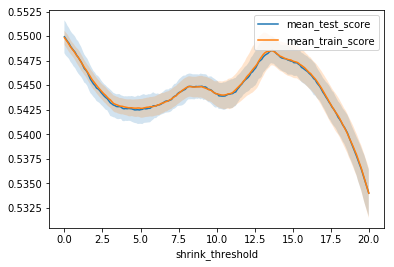

In [ ]:
param_range=np.linspace(0,20,200)
fig,ax=plt.subplots()
ax.plot(param_range,grid_NC.cv_results_['mean_test_score'],label='mean_test_score')
ax.fill_between(param_range,grid_NC.cv_results_['mean_test_score']-grid_NC.cv_results_['std_test_score'],grid_NC.cv_results_['mean_test_score']+grid_NC.cv_results_['std_test_score'],alpha=0.2)
ax.plot(param_range,grid_NC.cv_results_['mean_train_score'],label='mean_train_score')
ax.fill_between(param_range,grid_NC.cv_results_['mean_train_score']-grid_NC.cv_results_['std_train_score'],grid_NC.cv_results_['mean_train_score']+grid_NC.cv_results_['std_train_score'],alpha=0.2)
ax.set_xlabel('shrink_threshold')
plt.legend()
plt.show()

## Task 2.4

In [ ]:
param_lr={'C':np.logspace(-2,1.2,15)}
param_svm={'C':np.logspace(-2,1,15)}
param_NC={'shrink_threshold':np.logspace(0,20,200)}

scaler=StandardScaler()
cols=covtype.columns
X=covtype[cols[:-1]]
y=covtype[cols[-1]]

lr_table={}
svm_table={}
NC_table={}
for rs in [0,3,8,11]:
    lr_table[rs]={}
    svm_table[rs]={}
    NC_table[rs]={}
    kfold=KFold(n_splits=5,shuffle=True,random_state=rs)

    for split in [0.01,0.1,0.25,0.75]:
       
        x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=split)
        scaler.fit(x_train)
        x_train_scaled=scaler.transform(x_train)
        
        grid_lr_fix=GridSearchCV(LogisticRegression(),param_grid=param_lr,cv=kfold)
        grid_lr_fix.fit(x_train_scaled,y_train)
        lr_table[rs][split]=grid_lr_fix.best_params_
      
        grid_svm_fix=GridSearchCV(LinearSVC(dual=False),param_grid=param_svm,cv=kfold)
        grid_svm_fix.fit(x_train_scaled,y_train)
        svm_table[rs][split]=grid_svm_fix.best_params_
    
        grid_NC_fix=GridSearchCV(NearestCentroid(),param_grid=param_NC,cv=kfold)
        grid_NC_fix.fit(x_train_scaled,y_train)
        NC_table[rs][split]=grid_NC_fix.best_params_

In [ ]:
lr_table=pd.DataFrame(lr_table)
svm_table=pd.DataFrame(svm_table)
NC_table=pd.DataFrame(NC_table)

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(14,4))
sns.heatmap(lr_table,annot=True,ax=ax[0])
ax[0].set_title('Logistic Regression')
ax[0].set_ylabel('training size')
ax[0].set_xlabel('random state')
sns.heatmap(svm_table,annot=True,ax=ax[1])
ax[1].set_title('Linear SVM')
ax[1].set_ylabel('training size')
ax[1].set_xlabel('random state')
sns.heatmap(NC_table,annot=True,ax=ax[2])
ax[2].set_title('Nearest Centroid')
ax[2].set_ylabel('training size')
ax[2].set_xlabel('random state')
plt.show()

## Task 2.5

In [ ]:
scaler=StandardScaler()
cols=covtype.columns
X=covtype[cols[:-1]].values
y=covtype[cols[-1]]
x_train,x_test,y_train,y_test=train_test_split(X,y)
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
lr=LogisticRegression(C=grid_logistic.best_params_['C'])
lr.fit(x_train,y_train)

fig=plt.figure(figsize=(14,7))
for i in range(1,8):
    ax=plt.subplot(2,4,i)
    ax.plot(lr.coef_[i-1,:])
    ax.set_xlabel('Variable')
    ax.set_ylabel('Coef')
    ax.set_title('Label %i'%i)
plt.tight_layout()
plt.suptitle('Logistic Regression (With tuned params)',fontsize=20)
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
svm=LinearSVC(C=grid_svm.best_params_['C'])
svm.fit(x_train,y_train)

fig=plt.figure(figsize=(14,7))
for i in range(1,8):
    ax=plt.subplot(2,4,i)
    ax.plot(svm.coef_[i-1,:])
    ax.set_xlabel('Variable')
    ax.set_ylabel('Coef')
    ax.set_title('Label %i'%i)
plt.tight_layout()
plt.suptitle('Linear SVM (With tuned params)',fontsize=20)
plt.subplots_adjust(top=0.85)
plt.show()